In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('C:\\Users\\dany\\.keras\\datasets\\reviews.csv')

In [3]:
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [4]:
sentences = dataset['text'].tolist()

In [5]:
lables = dataset['sentiment'].tolist()

In [6]:
for x in range(2):
    print(sentences[x])
    print(lables[x])
    print('\n')

So there is no way for me to plug it in here in the US unless I go by a converter.
0


Good case Excellent value.
1




In [7]:
import tensorflow_datasets as tfds

In [8]:
vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences,vocab_size,max_subword_length=5)

In [9]:
print("vacab size is: ",tokenizer.vocab_size)

vacab size is:  999


In [10]:
num = 5
print(sentences[num])
encoder = tokenizer.encode(sentences[num])
print(encoder)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [11]:
for i in encoder:
    print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [12]:
for i,sentence in enumerate(sentences):
    sentences[i] = tokenizer.encode(sentence)
print(sentences[5])

[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [13]:
max_length = 50
trunc_type = 'post'
padding_type = 'post'

In [14]:
sequences_padded = pad_sequences(sentences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [15]:
training_size = int(len(sentences)*0.8)

In [16]:
training_sequences = sequences_padded[0:training_size]
testing_sequences = sequences_padded[training_size:]
training_labels = lables[0:training_size]
testing_labels = lables[training_size:]

In [17]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [19]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [20]:
num_epochs = 30
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(training_sequences,training_labels_final,epochs=num_epochs,validation_data=(testing_sequences,testing_labels_final))

Epoch 1/30
50/50 [==============================] - 3s 7ms/step - loss: 0.6927 - accuracy: 0.5235 - val_loss: 0.6944 - val_accuracy: 0.4286
Epoch 2/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.5995 - val_loss: 0.6928 - val_accuracy: 0.4887
Epoch 3/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.5844 - val_loss: 0.6883 - val_accuracy: 0.5363
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6635 - val_loss: 0.6800 - val_accuracy: 0.5965
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6622 - accuracy: 0.7062 - val_loss: 0.6634 - val_accuracy: 0.6942
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.7602 - val_loss: 0.6479 - val_accuracy: 0.6942
Epoch 7/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.7847 - val_loss: 0.6257 - val_accuracy: 0.7268
Epoch 8/30
50/50 [==

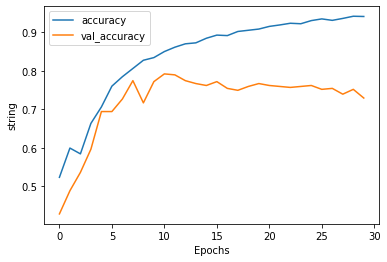

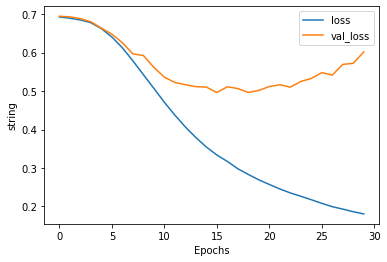

In [23]:

import matplotlib.pyplot as plt
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel('string')
    plt.legend([string,'val_'+string])
    plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [24]:
def predict_review(model,new_sentences,maxlen=max_length,show_padded_sequence=True):
    new_sequences = []
    for i,frvw in enumerate(new_sentences):
        new_sequences.append(tokenizer.encode(frvw))
    trunc_type = 'post'
    padding_type = 'post'
    new_review_padded = pad_sequences(new_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
    classes = model.predict(new_review_padded)
    for x in range(len(new_sentences)):
        if (show_padded_sequence):
            print(new_review_padded[x])
        print(new_sentences[x])
        print(classes[x])
        print('\n')

In [25]:
fake_reviews = ['i love this phone',"everything was cold"]

In [26]:
predict_review(model,fake_reviews)

[425 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
i love this phone
[0.91950476]


[272 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
everything was cold
[0.5194055]




In [39]:
def fit_model_now(model,sentences):
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    history = model.fit(training_sequences,training_labels_final,epochs=num_epochs,validation_data=(testing_sequences,testing_labels_final))
    return history

In [40]:
def plot_results(history):
    plot_graphs(history,'accuracy')
    plot_graphs(history,'loss')

In [41]:
def fit_model_and_show_result(model,sentences):
    history = fit_model_now(model,sentences)
    plot_results(history)
    predict_review(model,sentences)

In [42]:
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 3s 22ms/step - loss: 0.6928 - accuracy: 0.5122 - val_loss: 0.6968 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 1s 12ms/step - loss: 0.6749 - accuracy: 0.6039 - val_lo

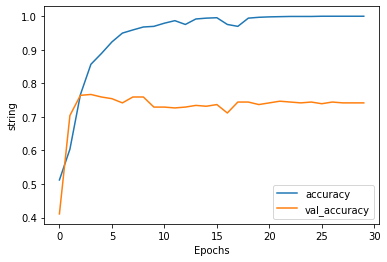

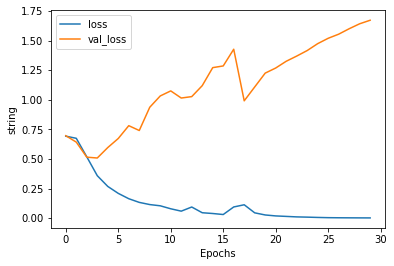

[425 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
i love this phone
[0.9995701]


[272 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
everything was cold
[0.91087633]




In [43]:
fit_model_and_show_result(model_bidi_lstm,fake_reviews)

In [44]:

model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length= max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 26,701
Trainable params: 26,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 4s 32ms/step - loss: 0.6908 - accuracy: 0.5323 - val_loss: 0.705

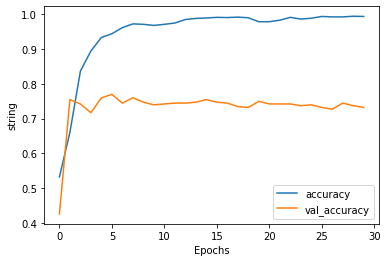

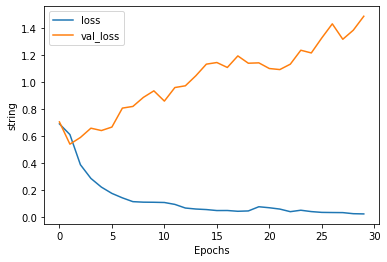

[425 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
i love this phone
[0.9998171]


[272 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
everything was cold
[0.21935621]




In [45]:
fit_model_and_show_result(model_multiple_bidi_lstm,fake_reviews)

In [46]:
my_reviews = ['lovely','dreadful','stay away', 'everything was hot exactly as i wanted']

In [47]:
print("======================================================\n","embedded only:\n","=======================")
predict_review(model,my_reviews,show_padded_sequence=False)

 embedded only:
lovely
[0.9457895]


dreadful
[0.39961272]


stay away
[0.7198992]


everything was hot exactly as i wanted
[0.77480316]




In [48]:
print("======================================================\n","embedded only:\n","=======================")
predict_review(model_bidi_lstm,my_reviews,show_padded_sequence=False)

 embedded only:
lovely
[0.99570125]


dreadful
[0.00962507]


stay away
[0.01439237]


everything was hot exactly as i wanted
[0.99986494]




In [49]:
print("======================================================\n","embedded only:\n","=======================")
predict_review(model_multiple_bidi_lstm,my_reviews,show_padded_sequence=False)

 embedded only:
lovely
[0.9996805]


dreadful
[0.00590442]


stay away
[0.00546685]


everything was hot exactly as i wanted
[0.9997012]


